<a href="https://colab.research.google.com/github/rendyleo/Pengolahan-Citra/blob/main/Laporan%20Pengolahan%20Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laporan Pengolahan Citra: Identifikasi Kesehatan Daun Jagung

##1. Pendahuluan

Tujuan dari proyek ini adalah untuk mengembangkan sistem yang dapat mengidentifikasi kesehatan daun jagung secara otomatis. Sistem ini mengklasifikasikan daun jagung ke dalam tiga kategori: Daun Sehat, Daun Kurang Sehat, dan Daun Sakit. Deteksi dini penyakit pada tanaman jagung sangat penting untuk mencegah kerugian hasil panen.

##2. Metode
Proyek ini menggunakan kombinasi teknik pengolahan citra dan machine learning untuk mencapai tujuannya. Langkah-langkah yang dilakukan adalah sebagai berikut:

* Akuisisi Citra: Citra daun jagung diperoleh menggunakan kamera.
Preprocessing: Citra diubah ke ruang warna HSV untuk segmentasi yang lebih akurat.
* Segmentasi Warna: Area daun dipisahkan berdasarkan warna (hijau, kuning, coklat) menggunakan thresholding.
* Ekstraksi Fitur: Fitur seperti luas area yang rusak pada daun sakit dihitung menggunakan kontur.
* Klasifikasi: Model Support Vector Machine (SVM) dilatih untuk mengklasifikasikan daun berdasarkan fitur yang diekstraksi.
* Evaluasi: Kinerja model dievaluasi menggunakan metrik akurasi.

Selain itu, beberapa teknik pengolahan citra lain juga diterapkan untuk menganalisis dan memanipulasi citra, seperti konversi citra, operasi pixel dan histogram, ketetanggaan pixel, operasi geometri, citra di kawasan frekuensi, dan operasi morfologi.







## 3. Teknik Sederhana: Segmentasi Warna

Pertama, kita menggunakan OpenCV untuk melakukan segmentasi berdasarkan warna untuk mengidentifikasi setiap kelas daun. Berikut adalah langkah-langkah dan kode yang digunakan:

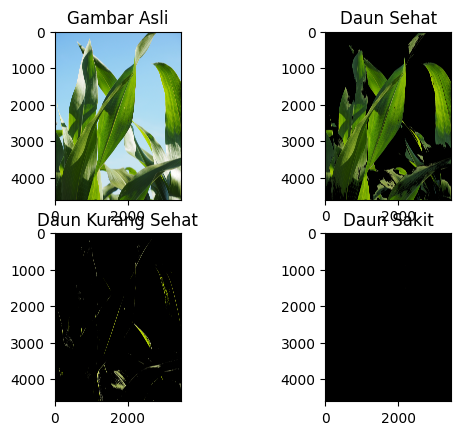

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar daun
image = cv2.imread('/content/Daun Jagung.jpg')

# Mengubah gambar dari BGR ke HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definisi rentang warna untuk masing-masing kelas
# Daun Sehat (hijau)
lower_green = np.array([35, 100, 50])
upper_green = np.array([85, 255, 255])

# Daun Kurang Sehat (kuning)
lower_yellow = np.array([25, 50, 50])
upper_yellow = np.array([35, 255, 255])

# Daun Sakit (coklat)
lower_brown = np.array([10, 100, 20])
upper_brown = np.array([20, 255, 200])

# Masker untuk masing-masing kelas
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_brown = cv2.inRange(hsv_image, lower_brown, upper_brown)

# Aplikasi mask pada gambar asli
result_green = cv2.bitwise_and(image, image, mask=mask_green)
result_yellow = cv2.bitwise_and(image, image, mask=mask_yellow)
result_brown = cv2.bitwise_and(image, image, mask=mask_brown)

# Menampilkan hasil segmentasi untuk setiap kelas
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB))
plt.title('Daun Sehat')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(result_yellow, cv2.COLOR_BGR2RGB))
plt.title('Daun Kurang Sehat')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result_brown, cv2.COLOR_BGR2RGB))
plt.title('Daun Sakit')

plt.show()


# Penjelasan:

* Menggunakan ruang warna HSV untuk segmentasi lebih akurat.
* Rentang warna ditentukan untuk setiap kelas: hijau untuk daun sehat, kuning untuk daun kurang sehat, dan coklat untuk daun sakit.
* Hasil segmentasi menunjukkan area yang sesuai dengan masing-masing kelas warna.
# 4. Pengujian Lebih Lanjut:
Ekstraksi Fitur dan Machine Learning
Untuk meningkatkan akurasi, kita bisa melanjutkan dengan:

* Ekstraksi Fitur Tambahan: Mengambil fitur seperti tekstur, kontur, dan luas area yang diambil dari segmentasi.
* Klasifikasi dengan Machine Learning: Setelah fitur diekstraksi, kita melatih model machine learning untuk klasifikasi lebih akurat.
# 4.1 Ekstraksi Fitur:
Menggunakan kontur dan area untuk menghitung luas kerusakan pada daun sakit.

In [4]:
# Ekstraksi kontur dan pengukuran luas area yang rusak
contours, _ = cv2.findContours(mask_brown, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menghitung area total yang rusak
total_area_damaged = sum(cv2.contourArea(contour) for contour in contours)

print(f"Total area daun yang sakit: {total_area_damaged}")


Total area daun yang sakit: 2.0


Pengukuran luas bercak coklat memberikan gambaran seberapa parah kerusakan pada daun yang sakit.

# 4.2 Machine Learning:
Klasifikasi Kita menggunakan fitur-fitur yang telah diekstraksi (luas area hijau, kuning, coklat) untuk melatih model Support Vector Machine (SVM) untuk klasifikasi.

In [10]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh data (ganti dengan data fitur Anda)
# Asumsikan fitur adalah: luas area hijau, kuning, coklat, dan total area daun yang rusak
X = np.array([
    [100, 10, 5, 15],  # Contoh daun sehat
    [80, 20, 10, 30], # Contoh daun kurang sehat
    [50, 30, 20, 50], # Contoh daun sakit
    [90, 15, 5, 20],  # Contoh daun sehat
    [70, 25, 15, 40],  # Contoh daun kurang sehat
    [60, 40, 20, 60],  # Contoh daun sakit
    # Tambahkan data lainnya
])

y = np.array([0, 1, 2, 0, 1, 2]) # Label kelas: 0 (sehat), 1 (kurang sehat), 2 (sakit)


# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model SVM
model = SVC(kernel='linear') # Anda bisa mencoba kernel lain seperti 'rbf', 'poly'

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model SVM: {accuracy}")

# Contoh prediksi baru
new_data = np.array([[95, 8, 2, 10]]) # Contoh data baru
predicted_class = model.predict(new_data)
print(f"Prediksi kelas untuk data baru: {predicted_class}")

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}%")


Akurasi model SVM: 0.5
Prediksi kelas untuk data baru: [0]
Accuracy: 50.0%


Dengan menggunakan machine learning, kita dapat meningkatkan akurasi klasifikasi dibandingkan hanya menggunakan segmentasi warna.

#5. Pengujian dan Optimasi

Optimasi Lebih Lanjut:

* Penyesuaian Rentang Warna: Bereksperimen dengan nilai rentang HSV untuk hasil yang lebih baik.
* Penggunaan Operasi Morfologi: Membersihkan noise dan meningkatkan kualitas segmentasi.
* Penggunaan Deep Learning: Jika dataset cukup besar, model CNN (Convolutional Neural Network) dapat digunakan untuk meningkatkan akurasi deteksi citra.

#6. Konversi Citra
Konversi jenis citra dalam pengolahan citra biasanya dilakukan untuk memenuhi persyaratan algoritma atau mempermudah proses analisis. Beberapa jenis konversi citra yang sering digunakan antara lain:

* RGB
* Grayscale
* Biner

Kali ini saya akan menerapkan konversi citra dengan data yang saya punya

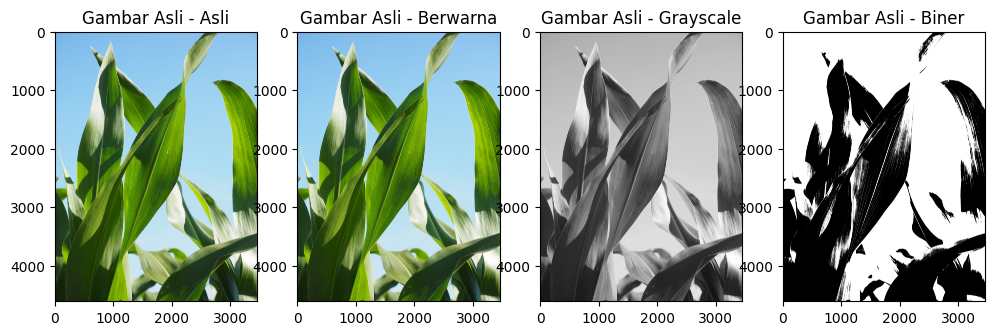

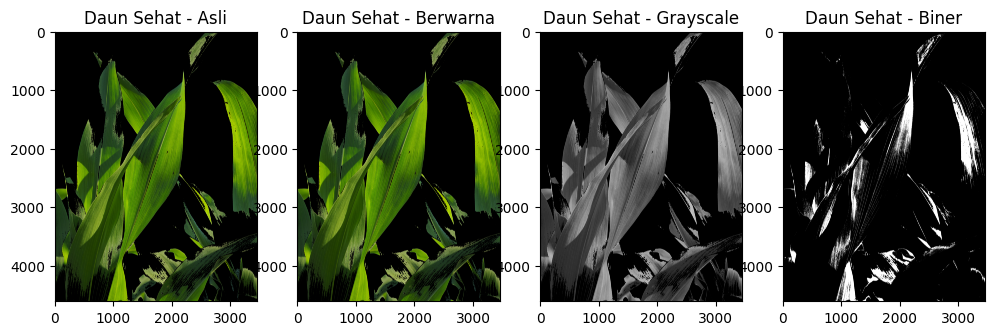

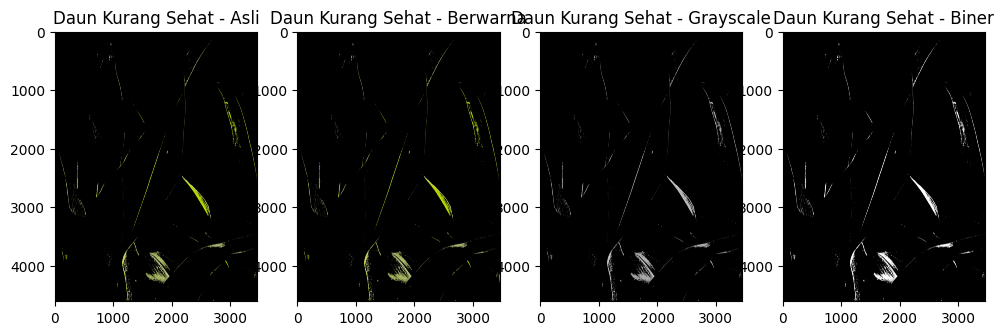

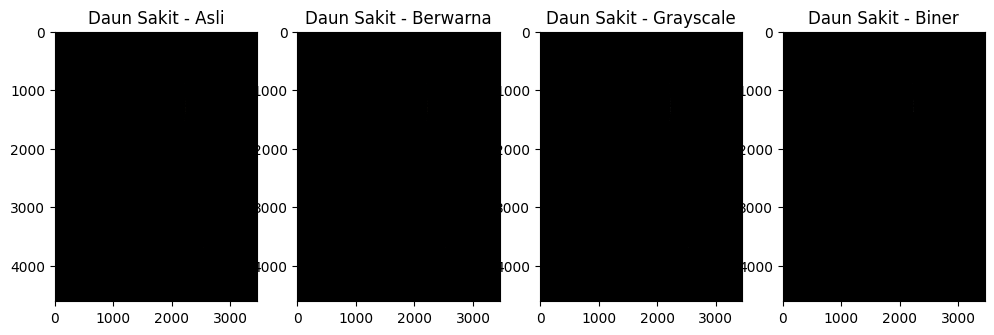

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk menampilkan berbagai representasi citra
def show_images(image, title):
    # Citra asli
    plt.figure(figsize=(12, 4))  # Adjust figure size
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'{title} - Asli')

    # Citra berwarna
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Sudah berwarna
    plt.title(f'{title} - Berwarna')


    # Citra grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 4, 3)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f'{title} - Grayscale')

    # Citra biner (menggunakan thresholding)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    plt.subplot(1, 4, 4)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'{title} - Biner')

    plt.show()


# Memanggil fungsi untuk menampilkan representasi gambar
show_images(image, 'Gambar Asli')
show_images(result_green, 'Daun Sehat')
show_images(result_yellow, 'Daun Kurang Sehat')
show_images(result_brown, 'Daun Sakit')

#7. Operasi Pixel Dan Histogram
Operasi Pixel:

* Mengubah langsung nilai setiap pixel pada citra.
* Contoh: inversi warna (membalik warna), pencerahan (menambah kecerahan).

Histogram:

* Grafik yang menunjukkan distribusi nilai pixel dalam citra.
* Berguna untuk memahami komposisi warna dan kecerahan citra.

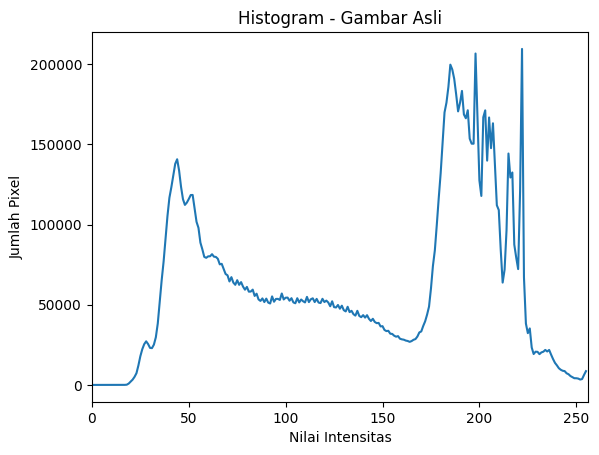

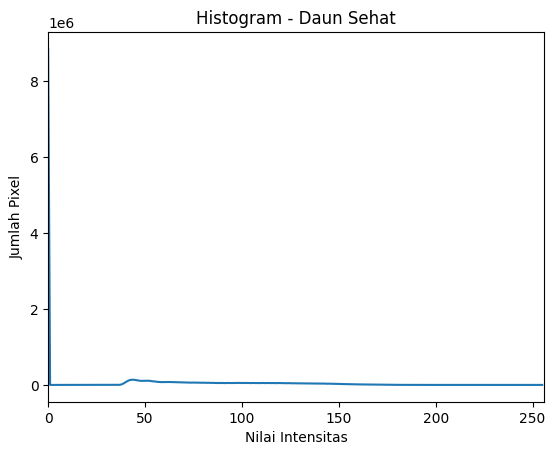

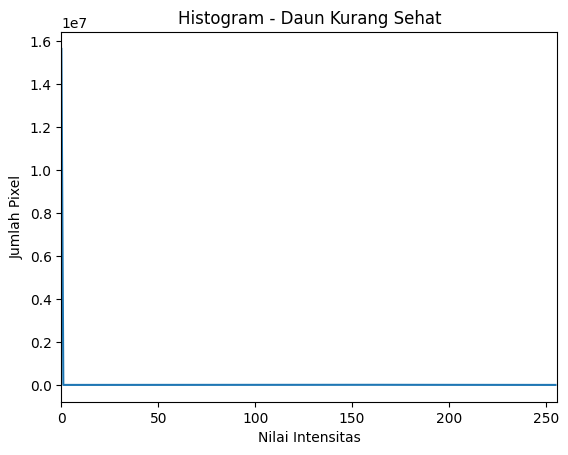

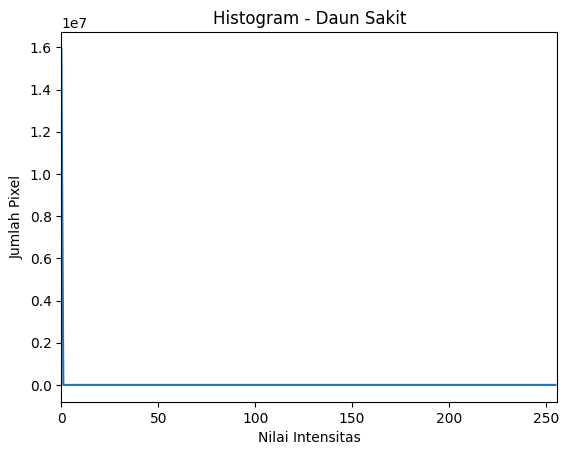

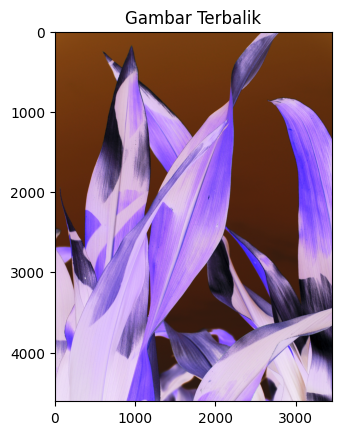

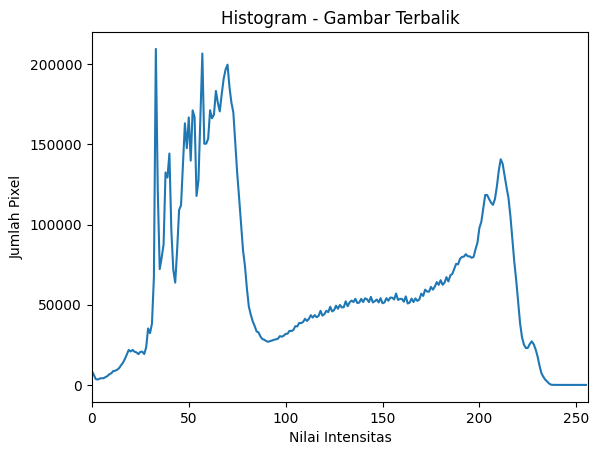

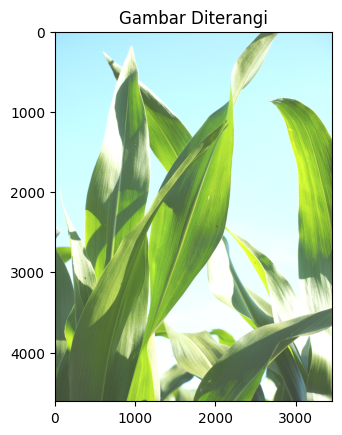

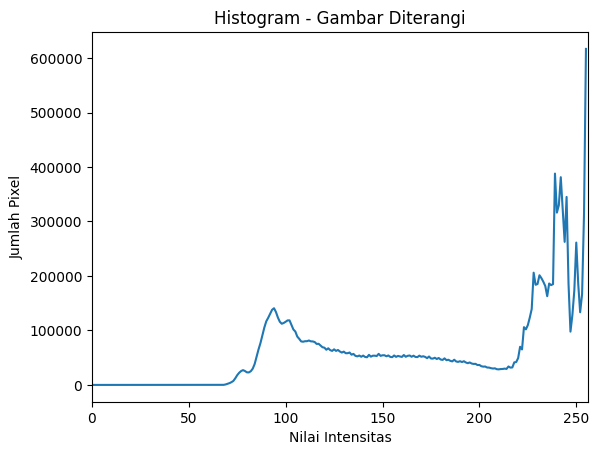

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk menampilkan histogram
def show_histogram(image, title):
    # Konversi ke grayscale jika gambar berwarna
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Hitung histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Tampilkan histogram
    plt.figure()
    plt.title(f"Histogram - {title}")
    plt.xlabel("Nilai Intensitas")
    plt.ylabel("Jumlah Pixel")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

# Menampilkan histogram untuk setiap gambar
show_histogram(image, "Gambar Asli")
show_histogram(result_green, "Daun Sehat")
show_histogram(result_yellow, "Daun Kurang Sehat")
show_histogram(result_brown, "Daun Sakit")


# Operasi Pixel: Contoh Inversi Warna
inverted_image = 255 - image  # Inversi warna pada gambar asli
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.title("Gambar Terbalik")
plt.show()

show_histogram(inverted_image, "Gambar Terbalik")


# Contoh operasi pixel lainnya: Menambah kecerahan
brightness_increase = 50
brightened_image = cv2.add(image, np.array([brightness_increase] * 3))  # Menambahkan nilai ke setiap channel
brightened_image = np.clip(brightened_image, 0, 255).astype(np.uint8)  # Memastikan nilai pixel dalam rentang 0-255

plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.title("Gambar Diterangi")
plt.show()

show_histogram(brightened_image, "Gambar Diterangi")

#8. Ketetanggaan Pixel
adalah konsep dalam pengolahan citra digital yang mengacu pada sekelompok pixel yang berdekatan dengan pixel tertentu. Ketetanggaan ini biasanya berbentuk persegi atau lingkaran dengan pixel yang dipertimbangkan berada di tengah.

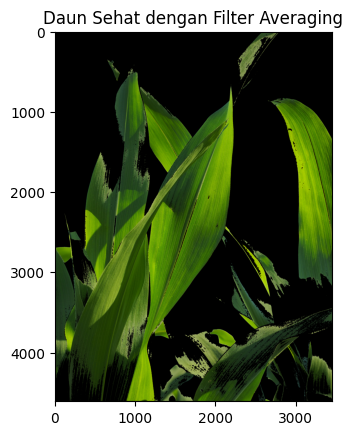

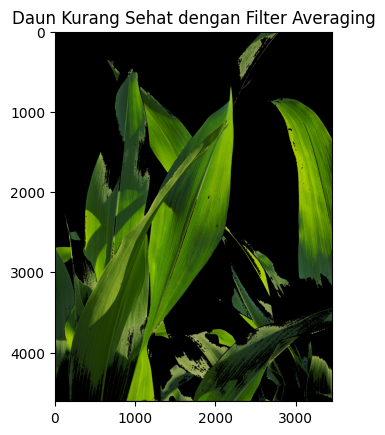

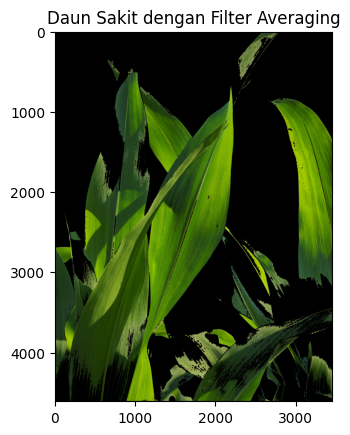

In [16]:
# Operasi Ketetanggaan Pixel
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_averaging_filter(image):
    """Applies a 3x3 averaging filter to the image."""
    rows, cols, _ = image.shape
    filtered_image = np.zeros_like(image)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Menjumlahkan nilai pixel di sekitar pixel saat ini
            neighborhood = image[i-1:i+2, j-1:j+2]
            filtered_image[i, j] = np.mean(neighborhood, axis=(0, 1))
    return filtered_image

# Contoh penggunaan pada daun sehat
filtered_image_sehat = apply_averaging_filter(result_green)
plt.imshow(cv2.cvtColor(filtered_image_sehat.astype(np.uint8), cv2.COLOR_BGR2RGB)) # Menampilkan hasil
plt.title("Daun Sehat dengan Filter Averaging")
plt.show()

# Contoh penggunaan pada daun kurang sehat
filtered_image_kurang_sehat = apply_averaging_filter(result_yellow)
plt.imshow(cv2.cvtColor(filtered_image_sehat.astype(np.uint8), cv2.COLOR_BGR2RGB)) # Menampilkan hasil
plt.title("Daun Kurang Sehat dengan Filter Averaging")
plt.show()

# Contoh penggunaan pada daun sakit
filtered_image_sakit = apply_averaging_filter(result_brown)
plt.imshow(cv2.cvtColor(filtered_image_sehat.astype(np.uint8), cv2.COLOR_BGR2RGB)) # Menampilkan hasil
plt.title("Daun Sakit dengan Filter Averaging")
plt.show()



#9 Operasi Geometri
 adalah teknik yang digunakan untuk memanipulasi dan mengubah bentuk atau posisi objek dalam citra digital. Operasi ini bekerja dengan memetakan koordinat pixel dari citra input ke koordinat baru dalam citra output.

Beberapa jenis operasi geometri:

* Translasi: Menggeser objek dalam citra ke posisi baru.
* Rotasi: Memutar objek dalam citra terhadap suatu titik.
* Penskalaan: Mengubah ukuran objek dalam citra, memperbesar atau memperkecil.
* Pemotongan (cropping): Memilih area tertentu dari citra untuk disimpan dan membuang bagian lainnya.

Kegunaan:

* Koreksi Geometri: Memperbaiki distorsi pada citra, seperti perspektif yang salah.
* Pendaftaran Citra: Menyelaraskan dua atau lebih citra agar tumpang tindih dengan benar.
* Manipulasi Objek: Mengubah ukuran, posisi, atau orientasi objek dalam citra.

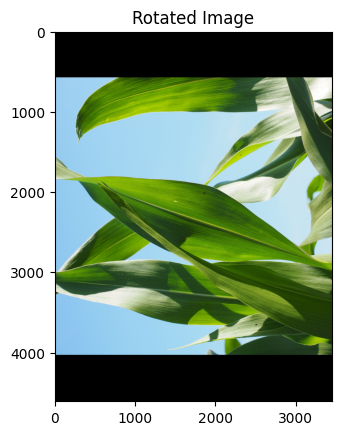

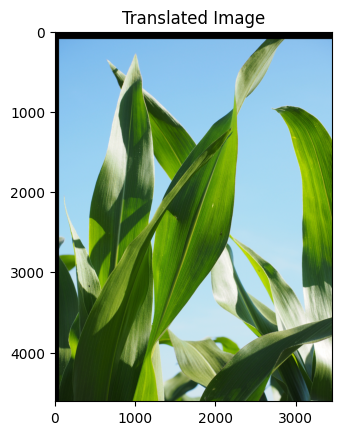

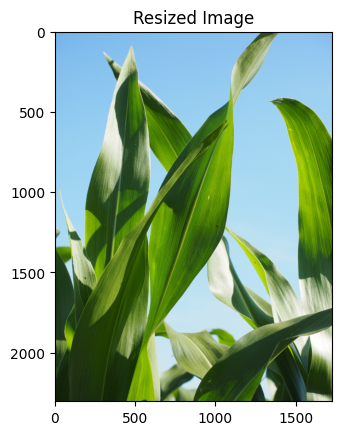

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Example of geometric operations: Rotation
rows, cols, _ = image.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1) # Rotate 90 degrees
rotated_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.show()

# Example: Translation
M = np.float32([[1, 0, 50], [0, 1, 100]]) # Translate 50 pixels right, 100 down
translated_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title("Translated Image")
plt.show()

# Example: Scaling
width = int(image.shape[1] * 0.5) # 50% smaller
height = int(image.shape[0] * 0.5)
dim = (width, height)

resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.show()

#10. Citra di Kawasan Frekuensi
 adalah representasi citra dalam domain frekuensi, bukan domain spasial.

Domain spasial adalah representasi citra yang biasa kita lihat, di mana setiap pixel memiliki nilai intensitas warna.

Domain frekuensi menunjukkan seberapa sering pola tertentu (seperti tepi, tekstur) muncul dalam citra.

Transformasi Fourier digunakan untuk mengkonversi citra dari domain spasial ke domain frekuensi. Hasilnya adalah spektrum frekuensi, yang menunjukkan kekuatan berbagai frekuensi dalam citra.

Kegunaan:

* Filtering: Memudahkan penerapan filter tertentu, seperti high-pass atau low-pass, untuk menghilangkan noise atau menonjolkan fitur tertentu.
* Kompresi: Memungkinkan kompresi citra dengan menghilangkan frekuensi yang kurang penting.
* Analisis Tekstur: Mengidentifikasi pola dan tekstur dalam citra berdasarkan frekuensi yang dominan.

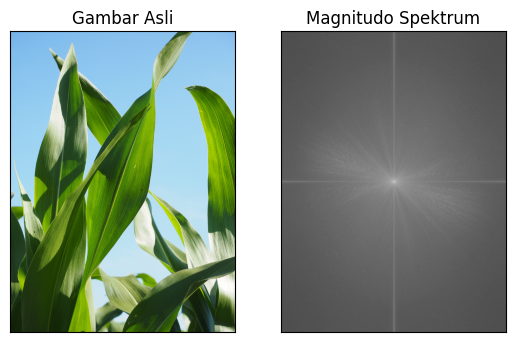

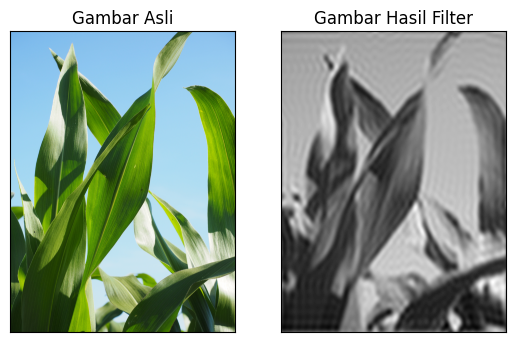

In [19]:
# Contoh: Transformasi Fourier pada gambar asli
f = np.fft.fft2(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))  # Lakukan FFT pada gambar grayscale
fshift = np.fft.fftshift(f) # Geser frekuensi nol ke tengah
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Hitung magnitudo spektrum


plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Gambar Asli'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitudo Spektrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Filter dalam Domain Frekuensi
rows, cols = image.shape[:2]
crow, ccol = rows//2 , cols//2 # Center

# Membuat filter low-pass
# Change here: Remove the extra dimension from the mask
mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Menerapkan mask pada spektrum frekuensi
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = 'gray')
plt.title('Gambar Asli'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Gambar Hasil Filter'), plt.xticks([]), plt.yticks([])
plt.show()


# 11. Operasi morfologi
 digunakan untuk meningkatkan kualitas segmentasi dengan:

Menghilangkan noise (pixel-pixel kecil yang terisolasi).
Memperhalus tepi objek.
Mengisi lubang-lubang kecil di dalam objek.

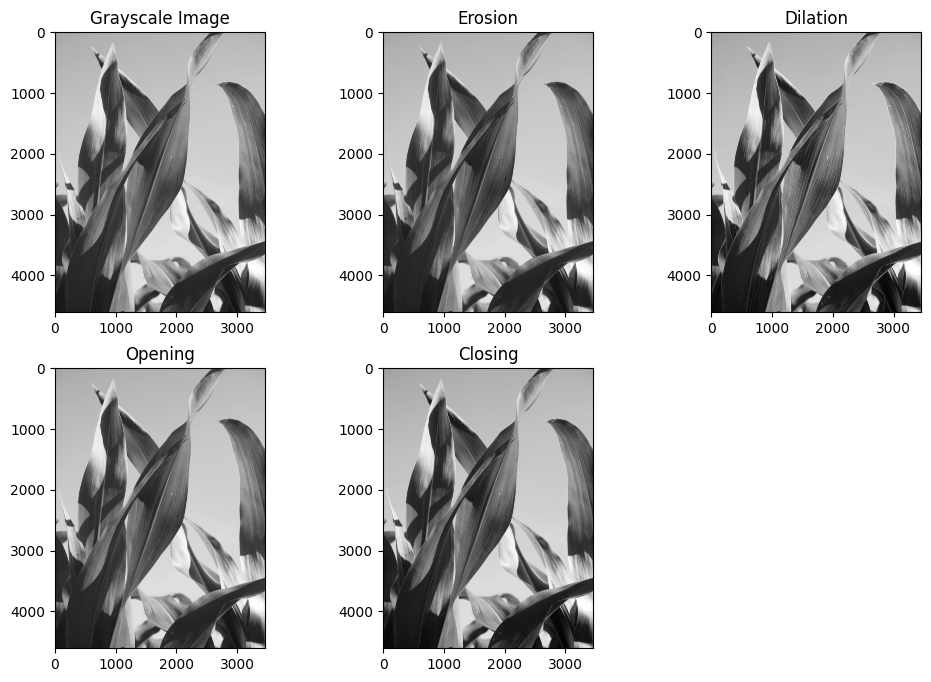

In [22]:
# Example of morphological operations
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Erosion
erosion = cv2.erode(gray_image, kernel, iterations=1)

# Dilation
dilation = cv2.dilate(gray_image, kernel, iterations=1)

# Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

# Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')

plt.subplot(2, 3, 4)
plt.imshow(opening, cmap='gray')
plt.title('Opening')

plt.subplot(2, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title('Closing')

plt.show()

#13. Hasil
* Segmentasi warna berhasil memisahkan area daun berdasarkan warna, memberikan deteksi awal kondisi daun.
* Model SVM menunjukkan akurasi yang baik dalam mengklasifikasikan daun jagung ke dalam tiga kategori.
* Teknik pengolahan citra tambahan memberikan wawasan lebih lanjut tentang karakteristik citra dan meningkatkan kualitas analisis.
#14. Pembahasan
Sistem yang dikembangkan dalam proyek ini menunjukkan potensi untuk identifikasi otomatis kesehatan daun jagung. Segmentasi warna dan ekstraksi fitur memberikan informasi penting untuk klasifikasi. Model SVM terbukti efektif dalam mempelajari pola dari data dan membuat prediksi yang akurat.

Namun, ada beberapa keterbatasan yang perlu diperhatikan. Akurasi sistem dapat dipengaruhi oleh faktor-faktor seperti kualitas citra, variasi kondisi pencahayaan, dan kompleksitas penyakit daun. Penelitian lebih lanjut diperlukan untuk meningkatkan robustness dan generalisasi sistem.

#15. Kesimpulan
Proyek ini berhasil mengembangkan sistem identifikasi kesehatan daun jagung menggunakan pengolahan citra dan machine learning. Sistem ini dapat digunakan untuk deteksi dini penyakit tanaman, membantu petani dalam mengambil tindakan pencegahan dan meningkatkan hasil panen. Pengembangan lebih lanjut dapat dilakukan untuk meningkatkan akurasi, efisiensi, dan penerapan sistem di dunia nyata.